In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv

In [66]:
# load dataset and show the first five sample
data = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [67]:
# rename the Annual Income (k$)	Spending Score (1-100) column
data = data.rename(columns={'Annual Income (k$)': 'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore'})
data.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [68]:
# describe data
data.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [69]:
# Check for null values in the dataset
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


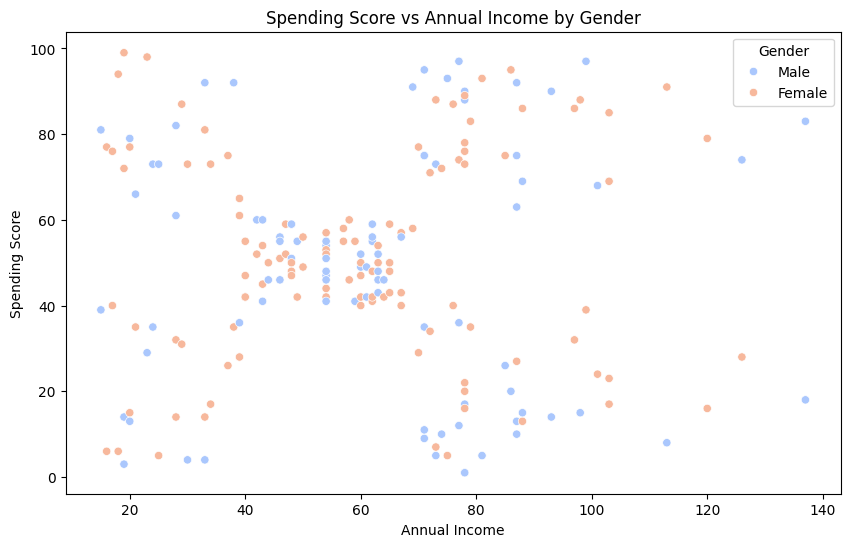

In [70]:
# make an insightful visualization and explain
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', data=data, hue='Gender', palette="coolwarm")
plt.title("Spending Score vs Annual Income by Gender")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

# Beberapa pelanggan dengan pendapatan tinggi memiliki skor pengeluaran rendah, sedangkan pelanggan dengan pendapatan menengah memiliki skor pengeluaran tinggi.
# Hal ini menunjukkan bahwa pengeluaran tidak selalu sebanding dengan pendapatan.

In [71]:
# make an insightful visualization and explain


## Data Preprocessing

For this case study, we only use income and spending score

In [72]:
# create new dataframe that consist only annual income and spending score
newData = data[['AnnualIncome', 'SpendingScore']]
newData.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [73]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
newData_scaled = scaler.fit_transform(newData)
newData_scaled = pd.DataFrame(newData_scaled, columns=newData.columns)
newData_scaled.head()

,AnnualIncome,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [74]:
# get stastical information on the new dataset
newData_scaled.describe()

,AnnualIncome,SpendingScore
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

<ipython-input-75-9ec4b9a2a01a>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=newData_scaled, x='AnnualIncome', y='SpendingScore', palette='viridis')


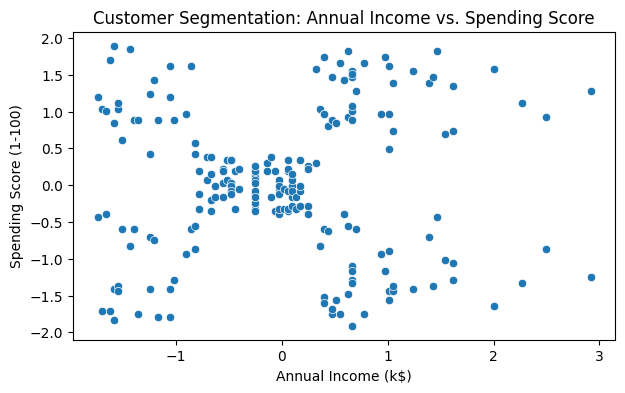

In [75]:
# Visualize the position
plt.figure(figsize=(7, 4))
sns.scatterplot(data=newData_scaled, x='AnnualIncome', y='SpendingScore', palette='viridis')
plt.title('Customer Segmentation: Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

<ipython-input-76-38d4229e1ac8>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x='AnnualIncome', y='SpendingScore', palette='viridis')


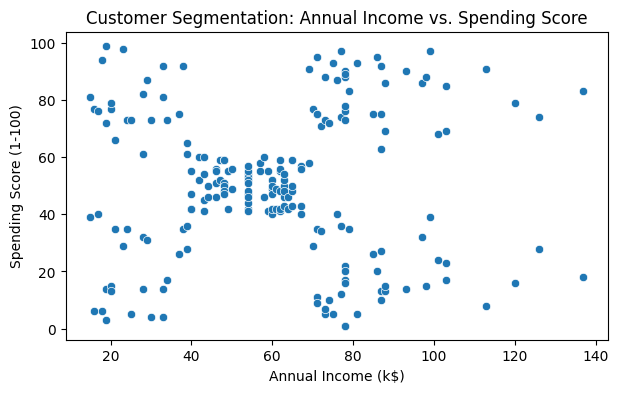

In [76]:
# Visualize the position using the original scale
plt.figure(figsize=(7, 4))
sns.scatterplot(data=data, x='AnnualIncome', y='SpendingScore', palette='viridis')
plt.title('Customer Segmentation: Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [77]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, n_init='auto', random_state=42)
    kmeans.fit(newData_scaled)
    sse.append(kmeans.inertia_)

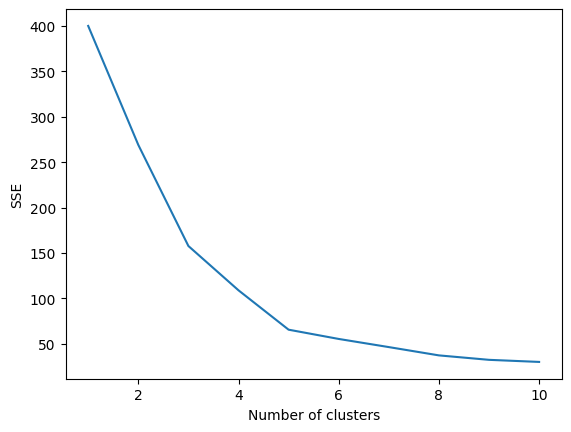

In [78]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [79]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator
kneedle = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
print('The best k for you model is', kneedle.elbow)

The best k for you model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [80]:
# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(newData_scaled)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

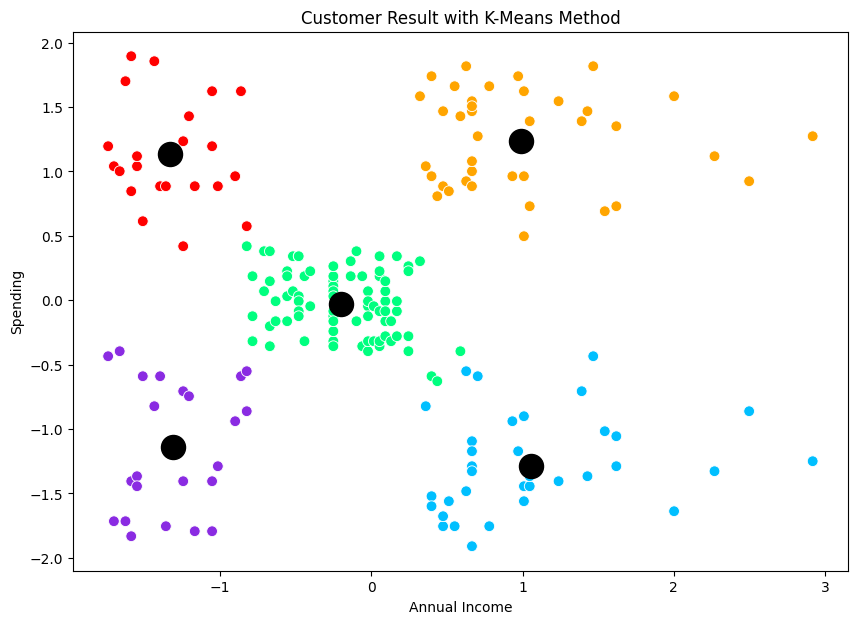

In [81]:
# visualize the result using scater chart
plt.figure(figsize=(10, 7))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue=y_pred, palette=["blueviolet",
                                                                          "red",
                                                                          "deepskyblue",
                                                                          "orange",
                                                                          "springgreen"],
                legend=None, data=newData_scaled, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids')
plt.ylabel("Spending")
plt.xlabel("Annual Income")
plt.title('Customer Result with K-Means Method')
plt.show()

In [82]:
# Inverse transform the scaled data to get the original values
dataInverse = pd.DataFrame(scaler.inverse_transform(newData_scaled), columns=newData_scaled.columns)
dataInverse['Cluster'] = y_pred
dataInverse.head()

,AnnualIncome,SpendingScore,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [83]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = dataInverse.groupby('Cluster').agg({'SpendingScore': ['mean','std','min','max'],'AnnualIncome':  ['mean','std','min','max']})
cluster_summary

SpendingScore                        AnnualIncome                   \
                 mean        std   min   max         mean        std   min   
Cluster                                                                      
0           20.913043  13.017167   3.0  40.0    26.304348   7.893811  15.0   
1           79.363636  10.504174  61.0  99.0    25.727273   7.566731  15.0   
2           17.114286   9.952154   1.0  39.0    88.200000  16.399067  70.0   
3           82.128205   9.364489  63.0  97.0    86.538462  16.312485  69.0   
4           49.518519   6.530909  34.0  61.0    55.296296   8.988109  39.0   

                
           max  
Cluster         
0         39.0  
1         39.0  
2        137.0  
3        137.0  
4         76.0

**Cluster 0**
Customers with low average annual income (around 26.3) and low Spending Score (around 20.9). Customers in this cluster have low spending scores despite low to moderate incomes. They are likely cautious spenders or may not be significantly interested in spending at the mall.


**Cluster 1**
Customers with low annual income (around 25.7) and high Spending Score (around 79.3). This cluster has a high spending score despite a lower income range, suggesting that these customers prioritize spending or are more impulsive buyers.


**Cluster 2**
Customers with high annual income (around 88.2) and low Spending Score (around 17.1). Customers in this cluster have high incomes but very low spending scores, indicating they are either conservative with their spending or do not find much value in the current offerings.


**Cluster 3**
Customers with high annual income (around 86.5) and high Spending Score (around 82.1). This cluster represents high-income, high-spending customers. They are likely the most profitable segment and are willing to spend freely.


**Cluster 4**
Customers with mid annual income (around 55.2) and mid Spending Score (around 49.5). Customers in this cluster have a balanced spending and income level, suggesting they are steady and reliable shoppers.

##Suggestions for Company
Design loyalty programs tailored to the spending behavior of each cluster to improve retention, particularly focusing on high-spending clusters (Clusters 1 and 3).

Collect feedback from low-spending clusters (especially Cluster 2) to understand barriers to spending and adapt offerings accordingly.

Consider expanding product lines to cater specifically to the preferences of each cluster, such as budget, mid-range, and premium items.

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

<write here>